## finding distance

In [1]:
import numpy as np

In [2]:
def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

In [3]:
p1 = np.array([1, 1])
p2 = np.array([4, 4])
print(distance(p1, p2))

4.24264068712


## majority vote

In [4]:
import random

In [8]:
def count_votes(votes):
    """
    Return dictionary vote:counts (number that 
    each vote is repeated in votes).
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    return vote_counts        

In [9]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 3]
vote_counts = count_votes(votes)
print(vote_counts)

{1: 2, 2: 2, 3: 6}


In [10]:
print(max(vote_counts.values()))

6


In [11]:
from collections import Counter

In [12]:
Counter(votes)

Counter({1: 2, 2: 2, 3: 6})

In [13]:
def count_votes_fast(votes):
    return Counter(votes)

In [5]:
# ---------------------------

In [15]:
def majority_vote(votes):
    """
    Return the most common element in votes
    """
    winners = []
    vote_counts = count_votes_fast(votes)
    max_count = max(vote_counts.values())
    for (vote, count) in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners) 

In [16]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 3]
vote_counts = majority_vote(votes)
print(vote_counts)

3


In [21]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
vote_counts = majority_vote(votes)
print(vote_counts)

2


In [42]:
# we may simplify this function if we note 
# that we're looking for a *mode* of a numpy array
# (mode - is the most common element)
import scipy.stats as ss

In [43]:
def majority_vote_short(votes):
    """
    Return the most common element in votes
    """
    (mode, count) = ss.mstats.mode(votes)
    return mode

In [44]:
votes = [1, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 2]
vote_counts = majority_vote_short(votes)
print(vote_counts)

[ 2.]


## finding nearest neighbors

In [22]:
import matplotlib.pyplot as plt

In [23]:
% matplotlib inline

In [24]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

In [25]:
p = np.array([2.5, 2])

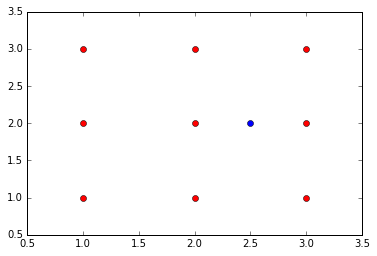

In [27]:
plt.plot(points[:,0], points[:,1], 'ro');
plt.plot(p[0], p[1], 'bo');
plt.axis([0.5, 3.5, 0.5, 3.5]);

In [28]:
distances = np.zeros(len(points))
for i in range(len(points)):
    distances[i] = distance(p, points[i])

In [29]:
distances

array([ 1.80277564,  1.5       ,  1.80277564,  1.11803399,  0.5       ,
        1.11803399,  1.11803399,  0.5       ,  1.11803399])

In [30]:
# we interested in index of sorted array, not
# array itself
ind = np.argsort(distances)

In [31]:
distances[ind]

array([ 0.5       ,  0.5       ,  1.11803399,  1.11803399,  1.11803399,
        1.11803399,  1.5       ,  1.80277564,  1.80277564])

In [32]:
# 2 nearest points
points[ind[:2]]

array([[2, 2],
       [3, 2]])

In [33]:
# --------------------------

In [34]:
def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and retusrn their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [35]:
ind = find_nearest_neighbors(p, points)
points[ind[:2]]

array([[2, 2],
       [3, 2]])

In [36]:
# --------------------------

In [37]:
# (1) find k nearest points to p (indicies of these points)
# (2) define major outcome feom outcomes using majority_vote()
def knn_predict(p, points, outcomes, k=5):
    """
    Find k nearest points and return dominant color 
    (stored in outcomes)
    """
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [38]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [39]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [40]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

## generate syntetic data

In [45]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis=0)

array([[ 0.33082767, -0.16263659],
       [ 0.38018587, -1.36399505],
       [ 0.24934508, -0.23106218],
       [-2.59508403,  0.74023841],
       [ 0.51739577,  0.87869367],
       [ 2.00137859, -0.58255545],
       [-0.1401723 ,  1.7106972 ],
       [-0.20639267,  2.01188311],
       [ 1.66720057, -1.04437936],
       [-0.46923574,  0.77437168]])

In [46]:
n = 5
outcome = np.concatenate((np.repeat(0, n), np.repeat(1,n)))
print(outcome)

[0 0 0 0 0 1 1 1 1 1]


In [47]:
def generate_synth_data(n=50):
    """Create 2 sets of points from bivariate normal distribution"""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1,n)))
    return (points, outcomes)

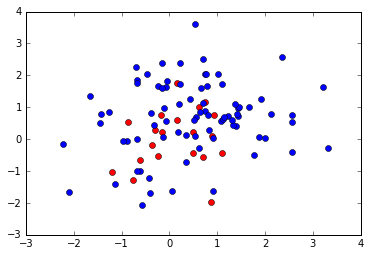

In [49]:
n = 20
(points, outcomes) = generate_synth_data()
plt.figure();
plt.plot(points[:n,0], points[:n,1], "ro");
plt.plot(points[n:,0], points[n:,1], "bo");

In [51]:
# ---------------------------------

In [56]:
n = 20

In [57]:
np.random.normal(0, 1, (n,2))[:5]

array([[ 0.69816088, -0.5040839 ],
       [ 0.56101721, -0.35856774],
       [-0.23799876, -1.775542  ],
       [-0.26693633,  0.60030337],
       [ 1.59414122, -0.01219963]])

In [67]:
points = np.concatenate((np.random.normal(0, 1, (n,2)), np.random.normal(1, 1, (n,2))), axis=0)
points[:5]

array([[-0.54776916,  0.55355112],
       [-0.36232611,  0.16272664],
       [ 1.32798278, -1.90554024],
       [-0.30269347, -0.21413037],
       [-1.12524547,  0.00832781]])

In [68]:
outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)), axis=0)
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

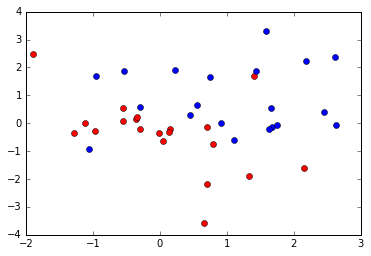

In [69]:
plt.plot(points[:n, 0], points[:n, 1], 'ro');
plt.plot(points[n:, 0], points[n:, 1], 'bo');

In [52]:
# ---------------------------------

In [118]:
! git add .; git ci -m "done 1st part of kNN case"; git push

[master 717278b] done 1st part of kNN case
 1 file changed, 793 insertions(+)
 create mode 100644 lectures/week3/kNN/kNN.ipynb
Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 13.56 KiB | 0 bytes/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:ilyarudyak/PH526x_python_research.git
   96c48c4..717278b  master -> master


## making a prediction greed

In [119]:
seasons = ["spring", "summer", "fall", "winter"]

In [121]:
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [122]:
for i, season in enumerate(seasons):
    print('{}:{}'.format(i, season))

0:spring
1:summer
2:fall
3:winter


In [125]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid"""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for (i, x) in enumerate(xs):
        for (j, y) in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

## plotting prediction grid

In [126]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [133]:
(predictors, outcomes) = generate_synth_data()

In [134]:
predictors.shape

(100, 2)

In [135]:
outcomes.shape

(100,)

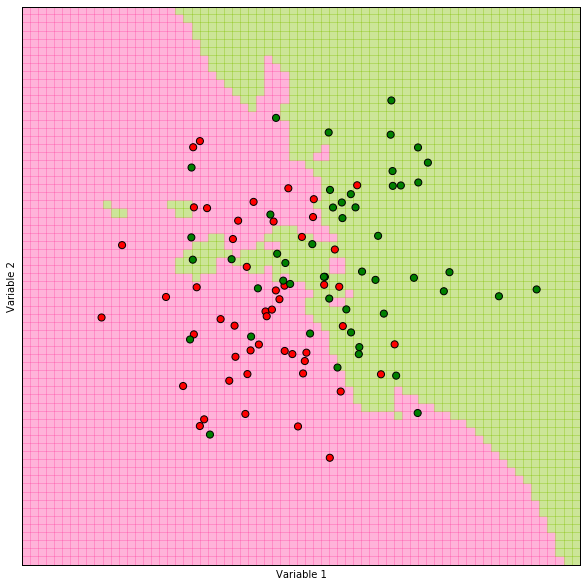

In [139]:
k=5; filename='knn_synth_5.pdf'; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

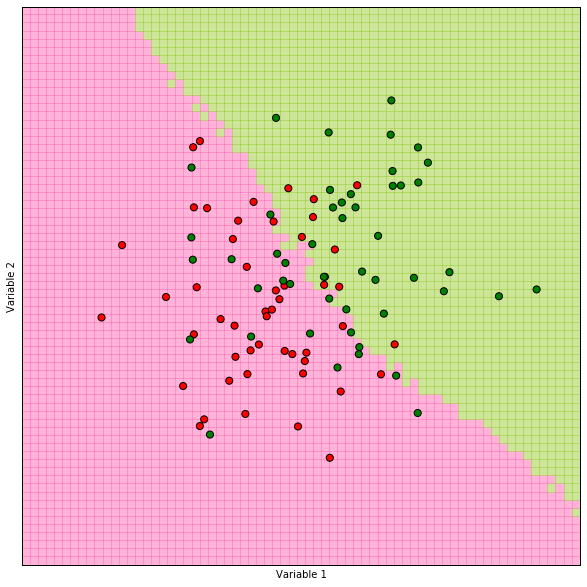

In [140]:
k=50; filename='knn_synth_50.pdf'; limits = (-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [141]:
! git add .; git ci -m "done major part of kNN case"; git push

[master f3dfa82] done major part of kNN case
 3 files changed, 231 insertions(+), 10 deletions(-)
 create mode 100644 lectures/week3/kNN/knn_synth_5.pdf
 create mode 100644 lectures/week3/kNN/knn_synth_50.pdf
Counting objects: 8, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 149.04 KiB | 0 bytes/s, done.
Total 8 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:ilyarudyak/PH526x_python_research.git
   717278b..f3dfa82  master -> master


In [142]:
a = np.array([[1,1], [2,2]])

In [143]:
a

array([[1, 1],
       [2, 2]])

In [144]:
a.shape

(2, 2)

In [150]:
a = np.array([[1,1], [2,2]])
a

array([[1, 1],
       [2, 2]])

In [151]:
b = np.array([[10,10], [20,20]])
b

array([[10, 10],
       [20, 20]])

In [152]:
np.concatenate((a, b), axis=0)

array([[ 1,  1],
       [ 2,  2],
       [10, 10],
       [20, 20]])

In [153]:
np.concatenate((a, b), axis=1)

array([[ 1,  1, 10, 10],
       [ 2,  2, 20, 20]])

## Applying the kNN Method

In [70]:
from sklearn import datasets

In [71]:
iris = datasets.load_iris()

In [74]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [76]:
predictors = iris['data'][:, 0:2]

In [77]:
predictors[:5]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])

In [79]:
outcomes = iris['target']

In [81]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

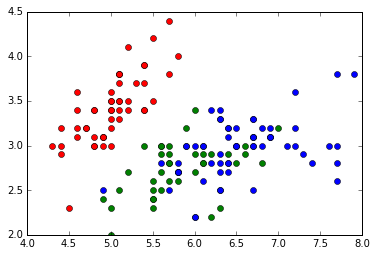

In [83]:
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], 'ro');
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], 'go');
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], 'bo');

In [84]:
# ---------------------------------

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)

In [87]:
knn.fit(predictors, outcomes)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
sk_predictions = knn.predict(predictors)

In [89]:
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [90]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, k=5) for p in predictors])

In [91]:
my_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
sk_predictions == my_predictions

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,